<a href="https://colab.research.google.com/github/helenross636/magic_season/blob/main/%23Task14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import time

In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
#random.seed(42)
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model1.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model2.h5')
model3 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model3.h5')
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/seed(42)/model4.h5')

In [4]:
models = []
models.append(model)
models.append(model2)
models.append(model3)
models.append(model4)

***КАК В ЗАДАНИИ***

-------------------------------------------------------------
30  НЕЙРОНОВ:
размерность весовой матрицы:  (30, 10)
размерность corrcief:  (30, 30)
Количество весов  с высокой корелляцией (> 0.9):  0
-------------------------------------------------------------
1 500  НЕЙРОНОВ:
размерность весовой матрицы:  (1500, 10)
размерность corrcief:  (1500, 1500)
Количество весов  с высокой корелляцией (> 0.9):  848
-------------------------------------------------------------
5 000  НЕЙРОНОВ:
размерность весовой матрицы:  (5000, 10)
размерность corrcief:  (5000, 5000)
Количество весов  с высокой корелляцией (> 0.9):  4427
-------------------------------------------------------------
10 000  НЕЙРОНОВ:
размерность весовой матрицы:  (10000, 10)
размерность corrcief:  (10000, 10000)
Количество весов  с высокой корелляцией (> 0.9):  9733


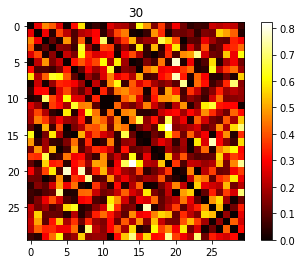

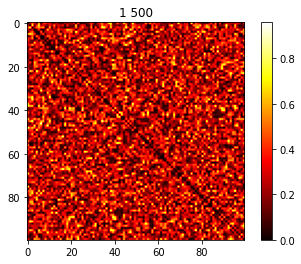

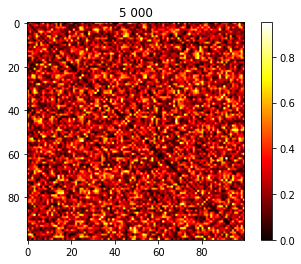

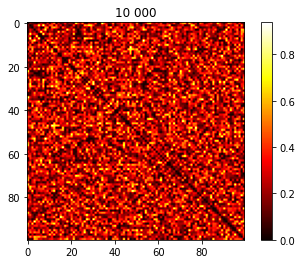

In [6]:
text = ['30', '1 500', '5 000', '10 000']

for k in range(4):
  print('-------------------------------------------------------------')
  print(text[k], ' НЕЙРОНОВ:')
  w2 = (models[k].layers[3].kernel)
  print('размерность весовой матрицы: ', w2.shape)
  am = np.abs(np.corrcoef(w2))
  np.fill_diagonal(am, 0)
  print('размерность corrcief: ', am.shape)
  plt.figure()
  plt.title(text[k])
  plt.imshow(am[:100, :100], cmap='hot')
  plt.colorbar()  

  nn = [i for i, a in enumerate(am) if np.sum(a > 0.9) != 0]
  print('Количество весов  с высокой корелляцией (> 0.9): ',len(nn))


***НЕМНОГО ДРУГИЕ ПАРАМЕТРЫ (ПРИБЛИЖЕНИЕ, ПОРОГ)***

-------------------------------------------------------------
30  НЕЙРОНОВ:
Количество весов  с высокой корелляцией (> 0.75):  7
Количество весов  с высокой корелляцией (> 0.8):  2
-------------------------------------------------------------
1 500  НЕЙРОНОВ:
Количество весов  с высокой корелляцией (> 0.75):  1500
Количество весов  с высокой корелляцией (> 0.8):  1499
-------------------------------------------------------------
5 000  НЕЙРОНОВ:
Количество весов  с высокой корелляцией (> 0.75):  5000
Количество весов  с высокой корелляцией (> 0.8):  5000
-------------------------------------------------------------
10 000  НЕЙРОНОВ:
Количество весов  с высокой корелляцией (> 0.75):  10000
Количество весов  с высокой корелляцией (> 0.8):  10000


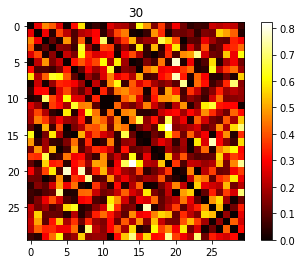

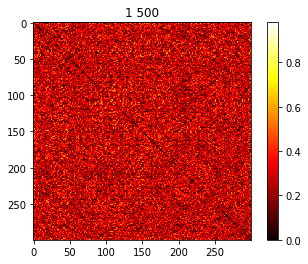

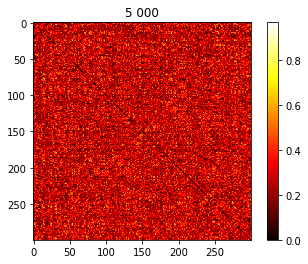

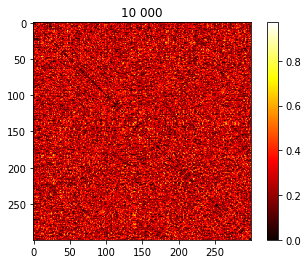

In [8]:
text = ['30', '1 500', '5 000', '10 000']

for k in range(4):
  print('-------------------------------------------------------------')
  print(text[k], ' НЕЙРОНОВ:')
  w2 = (models[k].layers[3].kernel)
  am = np.abs(np.corrcoef(w2))
  np.fill_diagonal(am, 0)
  plt.figure()
  plt.title(text[k])
  plt.imshow(am[:300, :300], cmap='hot')
  plt.colorbar()  

  nn = [i for i, a in enumerate(am) if np.sum(a > 0.75) != 0]
  print('Количество весов  с высокой корелляцией (> 0.75): ',len(nn))

  nn = [i for i, a in enumerate(am) if np.sum(a > 0.8) != 0]
  print('Количество весов  с высокой корелляцией (> 0.8): ',len(nn))
